<a href="https://www.kaggle.com/code/lugattuso/textblob-vs-vader-review-s-sentiment-analysis?scriptVersionId=153148835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of contents
* [Sentiment analysis using Womens Clothing E-commerce reviews](#section1)
    * [1. Importing libraries and dataset](#section2)
    * [2. Cleaning up the dataset ](#section3)
    * [3. Walking into the dataframe](#section4)
    * [4. Sentiment analysis](#section5)
    * [5. Conclusion](#section6)

 # Sentiment analysis using Womens Clothing E-commerce reviews  
 # 1. Introduction <a class="anchor"  id="section1"></a>

When product owners seek to understand customer opinions and experiences, sentiment analysis emerges as a powerful tool to understand user satisfaction. This analytical approach involves assessing the sentiment conveyed in phrases or texts, decoding the emotional tone behind words with the aim of uncovering customer preferences, desires, and primary concerns. By leveraging sentiment analysis, businesses can gain valuable insights into how their products are perceived, enabling them to make informed decisions and tailor their offerings to better meet customer needs.

This notebook aims to analyze customer reviews from a women's clothing e-commerce dataset, which is publicly available on Kaggle. Detailed information about the dataset can be accessed from the Kaggle website [https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews]. The dataset encompasses various attributes, including Clothing ID, Age, Review Title, Review Text, Rating, Division Name, Department Name, and Class Name.

The primary focus of this analysis will be on the 'Review Text' provided by customers, accompanied by their respective ratings on a scale from 1 to 5, where 5 denotes the highest satisfaction and 1 the lowest. Additionally, the analysis will take into account the 'Department' category, which covers a range of product types such as bottoms, dresses, intimates, jackets, etc., as well as the specific product 'Class'. Age of the reviewers will also be considered as a potentially insightful variable.

This analysis is designed to technically compare two prominent sentiment analysis tools, TextBlob and VADER, by delving into their key features and methodologies. The study will commence with an overview of the necessary libraries and proceed with data cleansing, followed by an Exploratory Data Analysis (EDA) to thoroughly comprehend the dataset, laying the groundwork for future insights. Subsequently, the focus will shift to an in-depth examination of TextBlob and VADER, juxtaposing their capabilities to ascertain which tool offers superior accuracy. Concluding the study, the analysis will pivot towards deriving business-centric insights, translating the technical findings into practical, actionable intelligence.

## Sentiment Analysis: The Roles of TextBlob and VADER

TextBlob is an open-source Python library tailored for processing textual data. It offers a straightforward API for performing basic Natural Language Processing (NLP) tasks. Integral to TextBlob's functionality is the Natural Language Toolkit (NLTK), a comprehensive library supporting a wide array of lexical resources and capabilities, including categorization and classification.

VADER (Valence Aware Dictionary and sEntiment Reasoner), on the other hand, is a pre-trained tool optimized for quick results, particularly beneficial in analyzing social media language. It excels at interpreting short, informal sentences, often laced with slang and abbreviations, common in social media contexts. However, its accuracy diminishes with longer, more structured sentences, making it a suitable starting point rather than a comprehensive solution.

Broadly speaking, there are two main approaches to sentiment analysis:

**Rule-Based Analysis:** This approach relies on predefined rules and keyword mappings, assigning numerical scores to gauge sentiment. TextBlob and VADER fall into this category. The primary limitation of rule-based algorithms is their lack of contextual understanding, an aspect this notebook aims to explore.

**Data-Driven Analysis:** In contrast, this method employs machine learning algorithms, trained on large datasets, to output a numerical value representing sentiment. This approach is generally more nuanced, capturing the subtleties of context and varied linguistic expressions.
By delving into these methodologies, this notebook seeks to investigate the constraints of rule-based sentiment analysis and compare it with data-driven approaches.

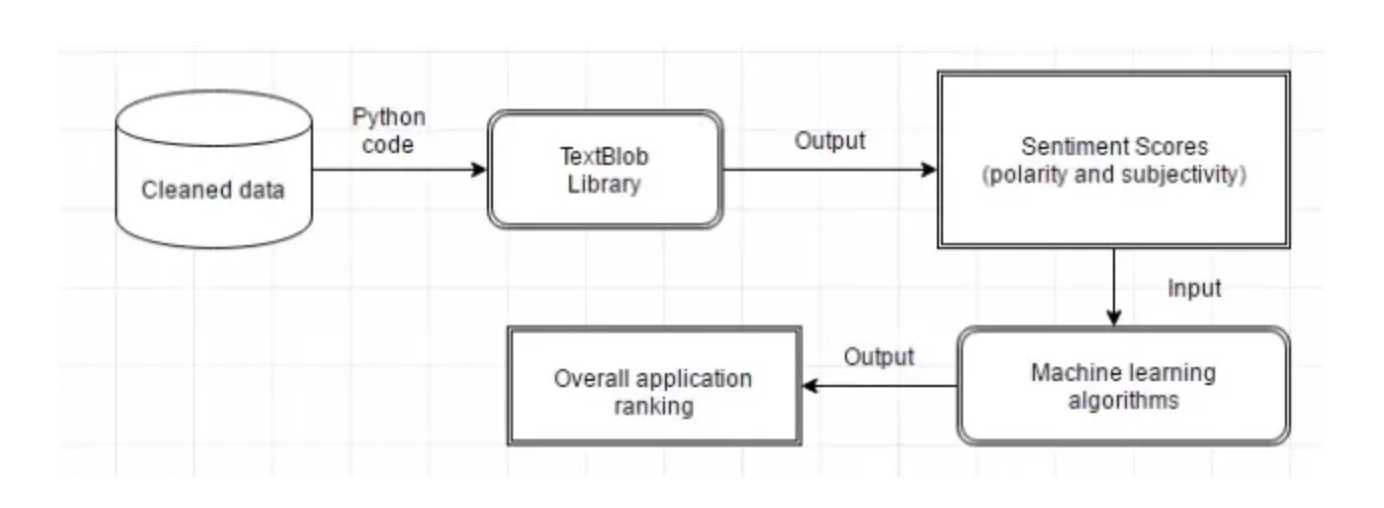

# 2. Importing libraries and dataset <a class="anchor"  id="section2"></a>

In [1]:
    pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, CountVectorizer

#Sentiment Analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Checking the current directory of the project before providing the file path
import os
os.listdir('/kaggle/input/womens-ecommerce-clothing-reviews')

['Womens Clothing E-Commerce Reviews.csv']

In [4]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

(23486, 11)


# 3. Cleaning up the dataset <a class="anchor"  id="section3"></a>
## 3.1 Initial Data Inspection


### To start with the cleaning process, a quick look once over of the dataset is useful to identify any outliers.

In [5]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
6155,6155,1081,62,NaN,I ordered this dress before it became availabl...,3,1,1,General Petite,Dresses,Dresses
10756,10756,960,37,Classic,Really great best. nice substantial material ...,5,1,0,General,Jackets,Jackets
18677,18677,1068,55,NaN,Flattering to the figure. i'm bustier and slig...,4,1,1,General Petite,Bottoms,Pants
7939,7939,877,33,NaN,"The shirt is nice, but not as nice a material ...",3,0,5,General Petite,Tops,Knits
374,374,836,44,Subdued sexy,"Surprisingly flattering on, especially with pa...",5,1,6,General,Tops,Blouses


### The data set contains 23,486 rows of data. At first glance, the dataset has one column that appears to contain redundant index information. The following code is to drop that column.

In [6]:
df = df.drop(columns = "Unnamed: 0")

### In addition, the column names could be improved and converted to snake case without spaces separated by an underscore, and all letters in lowercase.

In [7]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


## 3.2 Handling Missing Values


### Also, another good practice is to give a check on how many Null values there are in the dataset. 

Note: I personally like doing this before converting the objects into strings to avoid converting NA values into actual strings.

In [8]:
df.isna().sum() 

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

### Most of the null values are concentrated in the title column. Because we will not be working with this column during the analysis, this does not affect the results. The number of null values in *review_text* is also significant but this will be address in the next block of code.

In [9]:
rows_with_na = df[df['review_text'].isna()]
print(rows_with_na)

       clothing_id  age title review_text  rating  recommended_ind  \
92             861   23   NaN         NaN       5                1   
93            1081   31   NaN         NaN       5                1   
98            1133   50   NaN         NaN       5                1   
135            861   35   NaN         NaN       4                1   
142           1126   35   NaN         NaN       5                1   
...            ...  ...   ...         ...     ...              ...   
23258          862   35   NaN         NaN       4                1   
23301          862   52   NaN         NaN       5                1   
23303          823   46   NaN         NaN       5                1   
23470         1104   39   NaN         NaN       5                1   
23480          862   35   NaN         NaN       5                1   

       positive_feedback_count   division_name department_name class_name  
92                           0  General Petite            Tops      Knits  
93     

### The following code displays the rows of reviews that are empty (all these coincide with having an empty title as well). Out of the total 23,486 actual rows, 845 have null values on *review_text* and 3810 null *titles*. So by removing the empty *review_texts* rows we reduce the instances of null titles as well. Also, because the analysis is mostly based on *review_text*, the Nan values on *title* have no impact on our analysis.
### The way of dealing with null values will be different depending on the data we are handling and the purpose of the analysis. In this case, I'd like to know what percentage of the dataset these null values on reviews represents. 

In [10]:
total_rows = len(df)
missing_rows = df['review_text'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 3.60%


### Next step would be to drop rows with missing values from Reviews.

In [11]:
df = df.dropna(subset=['review_text'])

## 3.3 Checking for Duplicates 
### The following code evaluates each column of the DataFrame to identify rows containing identical data. The outcome marks duplicates as True while the first occurrence of any duplicate row remains unmarked (ex. False)

In [12]:
df[df.duplicated()]

#Note to self: Why double df[]? Because in order to get it filtered by the boolean indexing. 

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


## 3.4 Data Type Optimization
### Identifying data types in order to find mismatches and correctly setting data types is important for effective data cleaning and analysis.

In [13]:
df.dtypes

clothing_id                 int64
age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

### **Object** data types can be memory-intensive, especially if the column contains long strings or if there are many unique string values. In contrast, using more specific data types like *int* or *category* can save memory and improve performance.

### Also, in order to detect which ones are Categories, getting unique values from columns stored as Object could be a useful.

In [14]:
unique_division_name = df['division_name'].unique()
unique_department_name = df['department_name'].unique()
unique_class_name = df['class_name'].unique()

print("Unique values in the unique_division_name:", unique_division_name)

print("Unique values in the unique_department_name:", unique_department_name)

print("Unique values in the unique_class_name:", unique_class_name)

Unique values in the unique_division_name: ['Initmates' 'General' 'General Petite' nan]
Unique values in the unique_department_name: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Unique values in the unique_class_name: ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' nan 'Casual bottoms' 'Chemises']


### In this case, we could see there are some mispelled words like ¨Intimates¨ and replacing the wrong ones.

In [15]:
df['division_name'] = df['division_name'].str.replace('Initmates', 'Intimates')
df['department_name'] = df['department_name'].str.replace('Intimate', 'Intimates')

###  Columns converted into Category type.

In [16]:
df['division_name'] = df['division_name'].astype('category')
df['department_name'] = df['department_name'].astype('category')
df['class_name'] = df['class_name'].astype('category')

### Double checking boolean types and storing properly.

In [17]:
df['recommended_ind'].unique()

array([1, 0])

In [18]:
df['recommended_ind'] = df['recommended_ind'].astype('bool')

### Checking on how our new dataframe column's types.

In [19]:
df.dtypes

clothing_id                   int64
age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind                bool
positive_feedback_count       int64
division_name              category
department_name            category
class_name                 category
dtype: object

## 3.5 Data Index Reset
### It's often a good idea to reset the index for clarity and consistency, especially if the DataFrame will be used for further transformations or analyses.

In [20]:
df.reset_index(drop=True, inplace=True) 
#Note to self: inplace=True to avoid adding the old index as a new column

# 4. Exploratory Data Analysis (EDA) <a class="anchor"  id="section4"></a>

## 4.1 Qualitative Analysis
## Dataset's structure
### To gain a more comprehensive insight into the organization of the dataframe, a pivot table is utilized. This tool effectively illustrates the hierarchical arrangement of departments within divisions, providing a clear view of the dataset's structure.

In [21]:
#Note to self: Null values should be filled with Not specified.
df['division_name'] = df['division_name'].cat.add_categories('Not Specified').fillna('Not Specified')
df['department_name'] = df['department_name'].cat.add_categories('Not Specified').fillna('Not Specified')
df['class_name'] = df['class_name'].cat.add_categories('Not Specified').fillna('Not Specified')
 
pivot_table = pd.pivot_table(df, values='class_name', index=['division_name', 'department_name'], #lists unique class names for each department
                             aggfunc=lambda x: x.unique())

display(pivot_table)

class_name
division_name  department_name                                                   
General        Bottoms          ['Pants', 'Skirts', 'Jeans', 'Shorts', 'Casual...
               Dresses          ['Dresses']
Categories (21, object): ['Blouses...
               Jackets          ['Outerwear', 'Jackets']
Categories (21, objec...
               Tops             ['Blouses', 'Sweaters', 'Knits', 'Fine gauge']...
               Trend            ['Trend']
Categories (21, object): ['Blouses',...
General Petite Bottoms          ['Pants', 'Skirts', 'Jeans']
Categories (21, o...
               Dresses          ['Dresses']
Categories (21, object): ['Blouses...
               Intimates        ['Lounge']
Categories (21, object): ['Blouses'...
               Jackets          ['Jackets', 'Outerwear']
Categories (21, objec...
               Tops             ['Knits', 'Blouses', 'Fine gauge', 'Sweaters']...
               Trend            ['Trend']
Categories (21, object): ['Blouses',...
Intimates      Intimates        ['Intimates', 'Lounge', 'Sleep', 'Swim', 'Legw...
Not Specified  Not Specified    ['Not Specified']
Categories (21, object): ['B...

### The dataset is structured into three primary divisions: General, General Petite, and Intimates. Each of these divisions encompasses various departments, which are further categorized into classes.
#### General Division: This division includes a range of departments such as Bottoms, Dresses, Jackets, Tops, and Trend.
* The Bottoms department features classes like Pants, Skirts, Jeans, Shorts, and Casual Bottoms.
* The Dresses department is singularly classified as Dresses.
* In the Jackets department, you find classes like Outerwear and Jackets.
* The Tops and Trend departments have their respective unique classes.

#### General Petite Division: This division mirrors the General division with departments like Bottoms, Dresses, Jackets, Tops, and Trend. Additionally, it includes the Intimates department. Similar to the General division, the Bottoms, Dresses, Jackets, Tops, and Trend departments in General Petite have corresponding classes. The Intimates department under General Petite features specific classes pertinent to this category.
#### Intimates Division: The Intimates division is more specialized and contains a single department, Intimates, which encompasses various classes tailored to intimate apparel.

## 4.2 Quantitative Analysis
## A. Distribution Rating per Division

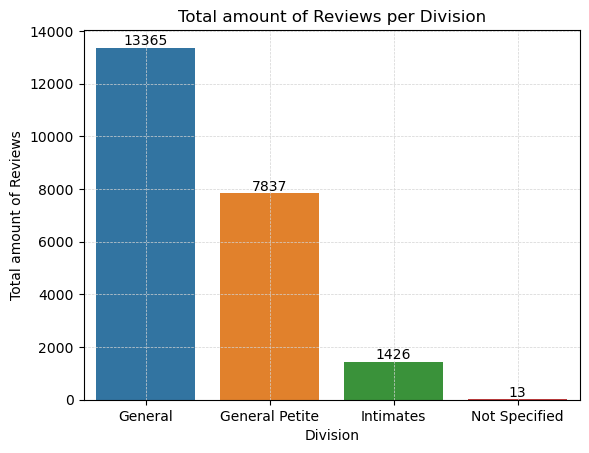

In [22]:
division_counts = df['division_name'].value_counts().sort_index() #number of reviews per rating

sns.barplot(x=division_counts.index, y=division_counts.values)

for i, count in enumerate(division_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom') #adding the totla on the bars

plt.xlabel('Division')
plt.ylabel('Total amount of Reviews')
plt.title('Total amount of Reviews per Division')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 

plt.show()

## B. Distribution of Reviews per Rating

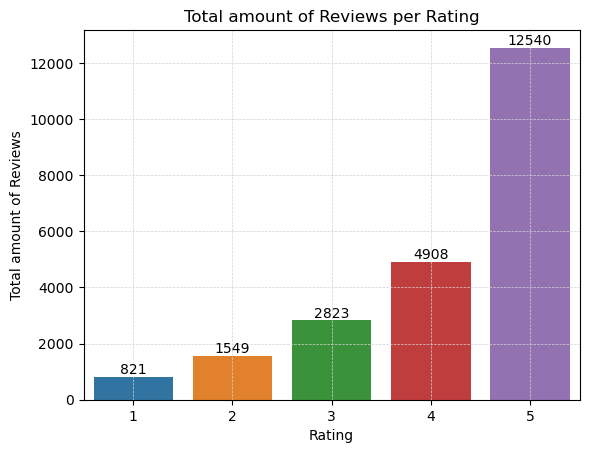

In [23]:
rating_counts = df['rating'].value_counts().sort_index() #reviews's count per rating

sns.barplot(x=rating_counts.index, y=rating_counts.values) #barchart

for i, count in enumerate(rating_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom') #total count of reviews in each bar

plt.xlabel('Rating')
plt.ylabel('Total amount of Reviews')
plt.title('Total amount of Reviews per Rating')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 

plt.show()

### The displayed plot reveals a concentration of customer reviews primarily in the 5 rating category, indicating that the dataset is predominantly positive in nature.

In [24]:
percentage_5_stars = (df['rating'] == 5).sum() * 100 / len(df)
print(f'5 stars ratings represent {percentage_5_stars:.2f}% of the dataframe')

5 stars ratings represent 55.39% of the dataframe


## C. Ratings distribution per *class_name* or Type of product

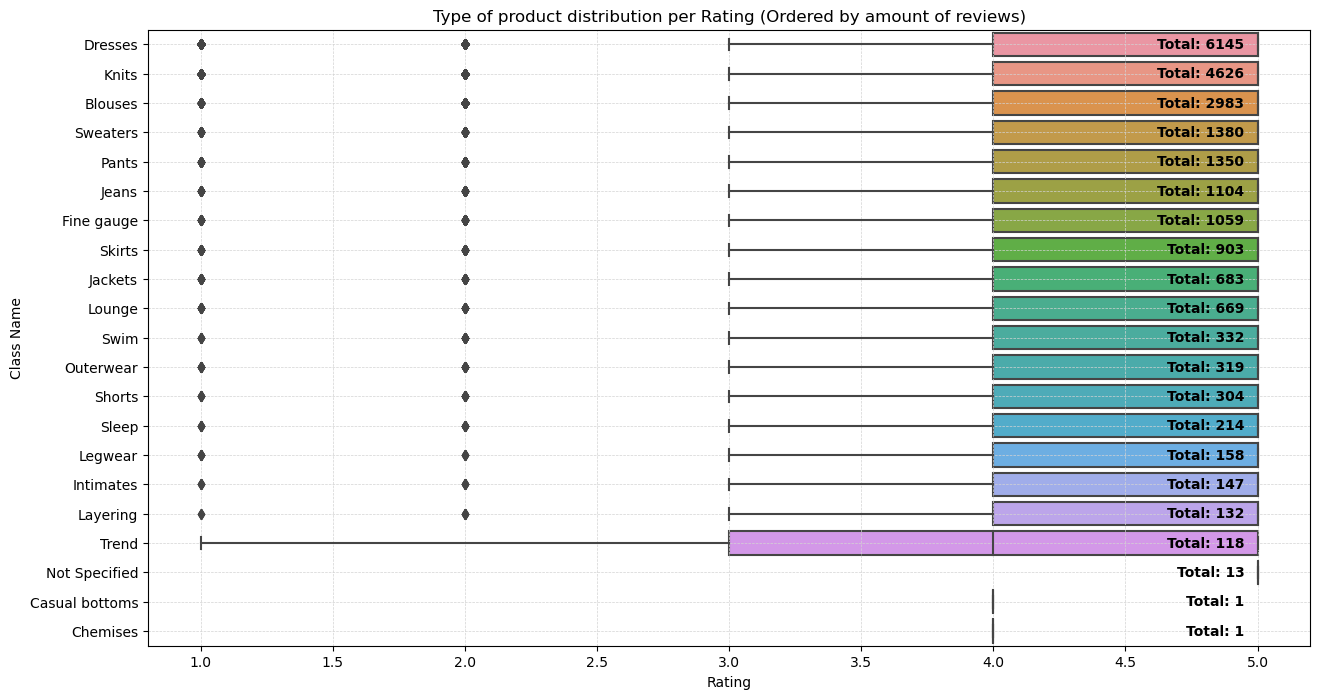

In [25]:
medians = df.groupby('class_name')['rating'].count().sort_values(ascending=False) #median values per group

sorted_names = medians.index.tolist() #order by medians

plt.figure(figsize=(15, 8))
ax = sns.boxplot(x=df['rating'], y=df['class_name'], order=sorted_names)

plt.xlabel('Rating')
plt.ylabel('Class Name')

x_max = ax.get_xlim()[1]

for i, class_name in enumerate(sorted_names):
    count = medians[class_name]
    ax.text(x_max -0.25, i, f'Total: {count}', va='center', color='black', fontweight='bold', ha='right') #total count of reviews

plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 
plt.title('Type of product distribution per Rating (Ordered by amount of reviews)')
plt.show()

### Despite the divison and departmental categories, this plot aims to analyze a general view of clothes per class. Displaying the distribution of the ratings, this boxplot makes it easy to detect outliers and which classes have the lower general rating. Totals are showing the total number of reviews per class.

### Trend seems to have the lower minimum values. To get further information a quick describe table will be displayed.

### Another relevant characteristic is that Casual bottoms and Chemises have only one review per Class. 

In [26]:
grouped_data = df.groupby('class_name')['rating'].describe()

sorted_data = grouped_data.sort_values(by=('mean'))

display(sorted_data) #color Trend, Casual bottoms, Sweaters, Chemises

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
Trend,118.0,3.838983,1.313769,1.0,3.0,4.0,5.0,5.0
Casual bottoms,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
Chemises,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
Dresses,6145.0,4.138812,1.127644,1.0,4.0,5.0,5.0,5.0
Blouses,2983.0,4.142809,1.140846,1.0,4.0,5.0,5.0,5.0
Knits,4626.0,4.145698,1.121563,1.0,4.0,5.0,5.0,5.0
Sweaters,1380.0,4.168841,1.134104,1.0,4.0,5.0,5.0,5.0
Swim,332.0,4.171687,1.125392,1.0,4.0,5.0,5.0,5.0
Outerwear,319.0,4.181818,1.129165,1.0,4.0,5.0,5.0,5.0


### Trend has a total of 118 reviews with a mean of 3.83 and Sweaters a higher mean of 4.16. There are a lot of other categories where there min is 1, for example, trend and sweater. However, these other cases are considered as outliers and not minimum values.

### The previous information is useful to know where to dig deeper, 
This information is useful to take it to a different granualrity

In [27]:
df_trend_class = df[df['class_name'] == 'Trend']

In [28]:

grouped_data = df_trend_class.groupby(['division_name', 'class_name']).agg({
    'rating': ['count', 'mean', 'min', 'max'],
    'clothing_id': pd.Series.nunique
})

grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values] #flatten the MultiIndex columns

sorted_data = grouped_data.sort_values(by='rating_mean') #order by rating mean

filtered_data = grouped_data[grouped_data['rating_count'] > 0] #excluding null values of categories that aren't part of the filtered_df

display(filtered_data)

,,rating_count,rating_mean,rating_min,rating_max,clothing_id_nunique
division_name,class_name,,,,,
General,Trend,95,3.852632,1.0,5.0,35.0
General Petite,Trend,23,3.782609,1.0,5.0,7.0


#note to self: When you perform a group-by operation on categorical data in pandas, it includes all categories that were defined in the original DataFrame, even if they don't appear in the subset. This is why you see rows with 0 counts and NaN values for classes that are not actually present in your subset df_trend.

To resolve this, you need to ensure that the categorical columns in your subset only contain categories that are actually present in that subset. One way to do this is by using the remove_unused_categories() method on the categorical columns. This method removes categories that are not present in the data.

## D. Age

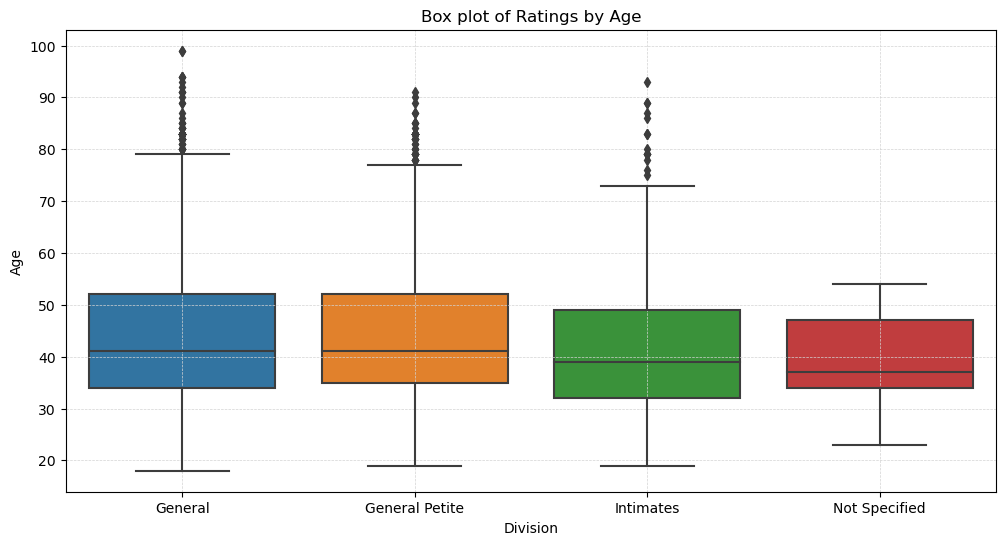

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division_name', y='age')
plt.title('Box plot of Ratings by Age')
plt.xlabel('Division')
plt.ylabel('Age')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 
plt.show()

### General has a median in 41 years, it's oldest outlier is 100 years old. Meantime, General Petite has the same mean but the oldest outlier is 91 years old. Also, the distribution of Age per division shows us that Intimates division has a generally young audience age where the mean is 39 years old and the Q3 (75%) is younger than 50 years. This is the youngest of all 3 divisions.

In [30]:
age_department_count = df.groupby(['department_name', 'age']).size().reset_index(name='count')
# print(age_department_count.head())

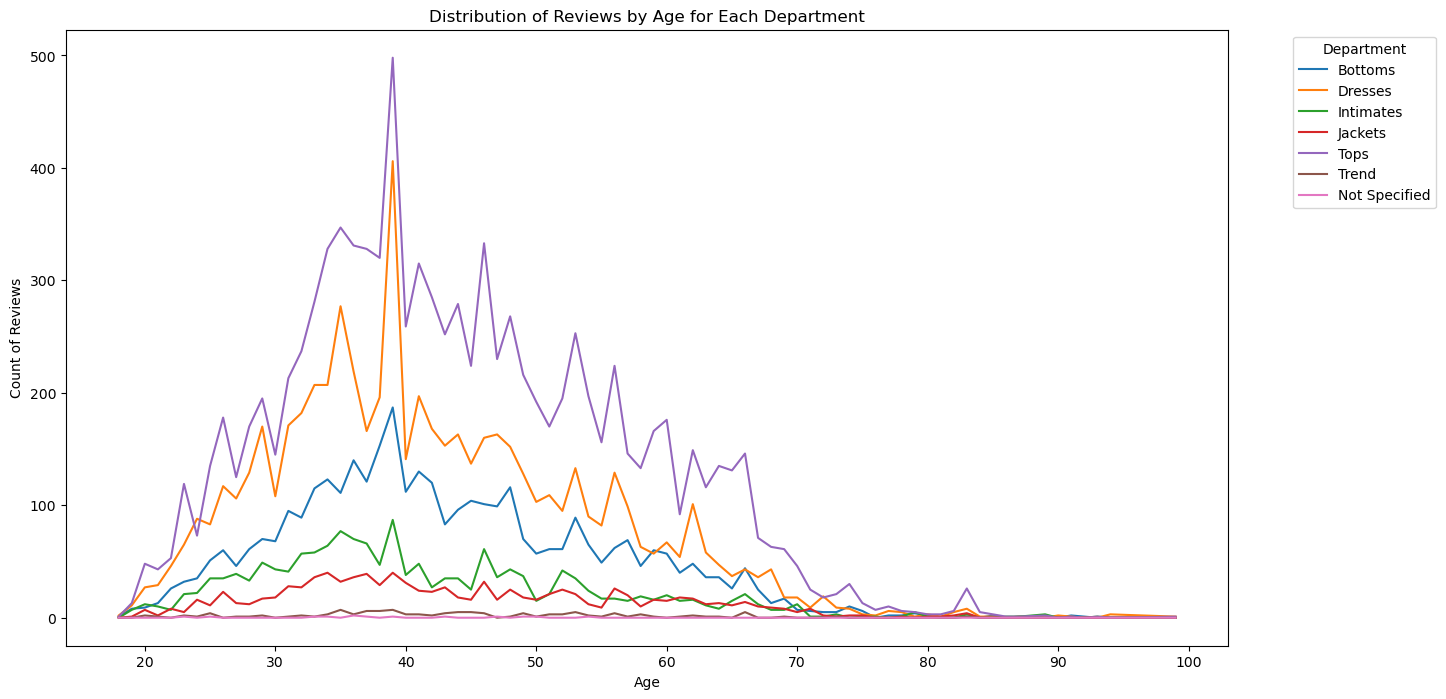

In [31]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=age_department_count, x='age', y='count', hue='department_name')

plt.xlabel('Age')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Reviews by Age for Each Department')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### In this case, the distribution of the age against the amount of reviews per department represents a similar distribution on age but it also shows that the amount of the reviews varies per department. Tops is the department with the highest amount of reviews across almost all ages, except for Dresses which is slightly higher for age 24.

In [32]:
total_reviews_per_department = df.groupby('department_name').size().sort_values(ascending=False)
print(total_reviews_per_department)

department_name
Tops             10048
Dresses           6145
Bottoms           3662
Intimates         1653
Jackets           1002
Trend              118
Not Specified       13
dtype: int64


### Validation test: age

In [33]:
min_age = df['age'].min()
max_age = df['age'].max()

if (min_age>18 & max_age<99):
    print(f"Test passed: Age goes from {min_age} to {max_age} which is makes sense.")
else:
    print(f"Test not passed, age goes from {min_age} to {max_age} ")

Test passed: Age goes from 18 to 99 which is makes sense.


# 5. Case Studies
## Case Study 1: 10 products with the lowest avg ratings

### The first thing to do is to group the ratings per product in order to get the mean of each of them, as well as counting the amount of ratings and counting the ones with rating = 1. In these first lines of code I won’t filter the results, because it could be useful to retain all the available data for now, in case we want to do any other similar inquiries later.

In [34]:
ratings_per_product = df.groupby('clothing_id').agg(
    avg_rating=('rating', 'mean'),
    count_ratings=('rating', 'size'),
    count_ones=('rating', lambda x: (x == 1).sum())  # Count reviews with rating of 1
)
#print(ratings_per_product)

### With the total data grouped by the amount of ratings, the following code filters by cases of more than one rating =1 and filters the 10 lowest average ratings. 
Using df.nsmallest(), a function that returns the first N occurrences ordered by a particular column in ascending order.

In [35]:
filter_higher_one = ratings_per_product[ratings_per_product['count_ones'] > 1]
N = 100
filter_lowest_avg = filter_higher_one.nsmallest(N, 'avg_rating')

#display(filter_lowest_avg) 

In [36]:
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_20/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Create a subdataframe with the results and merging it to other extra useful info.


In [37]:
filtered_df = df[df['clothing_id'].isin(filter_lowest_avg.index)] #filter by clothing_id

grouped_ratings = filtered_df.groupby('clothing_id')['rating'] #group by clothing_id per rating


idx = grouped_ratings.idxmin() #index of the minimum rating for each group

lowest_rated_reviews = df.loc[idx]

merged_data = pd.merge(filter_lowest_avg, lowest_rated_reviews[['clothing_id', 'review_text', 'rating', 'class_name']], 
                  left_index=True, right_on='clothing_id', how='left') #merge products per ratings with lowest-rated reviews

lowest_avg_ratings = merged_data
display(merged_data.head(10))

,avg_rating,count_ratings,count_ones,clothing_id,review_text,rating,class_name
6196,1.000000,2,2,973,"Even at a very deep discount, this piece is definitely not worth the money. the picture made me think this jacket had a longer curved velvet hem as part of its design (which would be cool)--which is largely what attracted me to it, but as i discovered when it arrived, that was actually part of the shirt worn beneath in the photo. so this image is rather misleading. the actual jacket is very thin--more like a shirt with an open front than a jacket. the pockets are just loosely tacked inside. for",1,Jackets
11859,1.800000,5,2,569,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret.",1,Trend
9540,2.000000,4,2,588,"The picture makes the shorts look structured. i assumed they were made of a heavier cotton material. i was disappointed when they turned out to be a light weight polyester. \r\n\r\nalso, this runs way too big. i am busty and did not fill out the top of the xs.\r\n\r\ni wouldn't even buy this at the sale price.",1,Shorts
16433,2.181818,11,4,229,"Ordered on line and thought these are a great quality as i pulled them out of the box. tried them on and found minimal elastic for the waist. within minutes of wearing, the waist fell down past my hips...glad i was at home. looks cute but will not stay up.",1,Legwear
9999,2.888889,9,2,1039,"These are terribly unflattering the wash looks dirty and the rise is not 10.5 like the description says, which is the only reason i gambled on these it is 13"".",1,Jeans
3404,3.105263,19,2,929,I was interested in this sweater because i actually thought it was a tunic. the sweater is much shorter than i thought. i wish i could return it. i bought a size large which is my normal size.,1,Sweaters
4301,3.222222,9,2,1145,I am not sure who would look good in this dress. it is extremely oversized with tons of fabric that will not flatter anyone!,1,Trend
3828,3.291667,24,4,1055,"I ordered these because of the side zipper, but they zip in front, even though the order listing and bag label called them ""wine, side zip pants."" they were also at least two sizes larger than marked and very flimsy material. what bothers me is that i was charged $5.95 to send them back, even though the product description (and the name before someone changed it on the website) were wrong.",1,Pants
1878,3.333333,24,3,1016,Cute skirt but i agree with the other reviewer. you can't get it on! i tried my skinny daughter tried no go!,1,Skirts
8727,3.400000,5,2,971,"This blazer looks great on the model and i have a long torso so i thought it would be perfect. when i got it it looked like a big box and didn't fit anywhere. the shoulder pads were giant and the bottom of the coat was huge. i got a small based on other reviews, but it was way too big. sadly, i had to return it.",1,Jackets


### Validation test: Before using .loc[], you can check if the indices in idx are present in df using set(idx).issubset(df.index). This will return True if all indices in idx are in df.

In [38]:
if (set(idx).issubset(df.index) == True):
    print("Test passed: idx´s index has everything of the df index")
else:
    print("Test not passed")    
    
#.issubset() to check if the indices are present in the original DataFrame is prudent. It ensures the integrity of your analysis.

Test passed: idx´s index has everything of the df index


# NOTE TO SELF: IGNORE PLS Pending: Discuss the implications of your findings. For example, why is it important to identify products with low ratings? How can this information be used by the business?Consider adding visualizations to complement your analysis. For instance, a bar chart showing the average ratings of these products could make the data more accessible and engaging.

# Conclude this case study with a summary of your findings. Discuss how businesses could use these insights for product improvement, customer service enhancement, or inventory management.

# You might also want to handle potential errors or edge cases in your code, ensuring robustness.

# NOTE TO SELF: IGNORE PLS  To make the case study even more robust, consider including qualitative analysis of the reviews for the lowest-rated products. What specific issues do customers mention? Are there common themes or problems?
# Analyzing customer feedback in detail, possibly using sentiment analysis tools, can provide a more comprehensive view of why these products are rated poorly.

# 6. Sentiment analysis <a class="anchor"  id="section5"></a>
## 6.1 Overview of TextBlob and VADER Tools

### As mentioned in the introduction, during this project Textblob and VADER will be utilized. First, I'm running a simple test to know how they work.

In [39]:
analyzer = SentimentIntensityAnalyzer() # loading Vader 

text = "This is a good example of VADER sentiment analysis"

vader_sentiment_scores = analyzer.polarity_scores(text)

print("Positive:", vader_sentiment_scores['pos'])
print("Negative:", vader_sentiment_scores['neg'])
print("Neutral:", vader_sentiment_scores['neu'])
print("Compound:", vader_sentiment_scores['compound'])

Positive: 0.266
Negative: 0.0
Neutral: 0.734
Compound: 0.4404


In [40]:
text_blob = TextBlob("This is a good example of a TextBlob")
sentiment_blob = text_blob.sentiment

polarity_blob = sentiment_blob.polarity
subjectivity_blob = sentiment_blob.subjectivity

print("TextBlob Polarity:", polarity_blob)
print("TextBlob Subjectivity:", subjectivity_blob)

TextBlob Polarity: 0.7
TextBlob Subjectivity: 0.6000000000000001


### In these examples, we have two different sentiment analysis tools providing sentiment scores for two similar statements. 

#### **TextBlob:** It provides polarity and subjectivity scores. In Example 1, the polarity score is 0.7, indicating a positive sentiment, and the subjectivity score is 0.6, indicating a moderate level of subjectivity.

#### **VADER:** It provides positive, negative, neutral, and compound scores. In Example 2, the compound score is 0.6369, which suggests a positive sentiment. The positive score (0.458) is the highest, indicating a positive sentiment.

#### Both tools generally agree on the sentiment of the given statements, classifying them as positive. However, the exact numeric scores may differ because each tool employs its own sentiment analysis algorithms and scoring systems. Additionally, TextBlob provides a subjectivity score, which VADER does not include in its output.


## 6.2 Integration of Sentiment Analysis in the Dataset
### A. Adding Textblob and Vader to the dataframe

In [41]:
desc_blob = [TextBlob(desc) for desc in df['review_text']] #loading descriptions into textblob

In [42]:
#TEXTBLOB sentiment metrics into the dataframe
df['tb_pol'] = [b.sentiment.polarity for b in desc_blob]
df['tb_subj'] = [b.sentiment.subjectivity for b in desc_blob]

#VADER metrics into dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['review_text']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['review_text']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['review_text']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['review_text']]

### *About the previous code*

This code added an extra column with the sentiment analysis, which includes polarity and subjectivity. 
**.sentiment** returns a namedtuple of the form Sentiment(polarity, subjectivity).

The code is used to calculate sentiment metrics for text data in a DataFrame using both TextBlob and VADER sentiment analysis tools. The `sentiment_calc` function is used with TextBlob to calculate sentiment polarity and subjectivity, while VADER is used to calculate compound, negative, neutral, and positive scores. Here's a breakdown of the code:

1. `sentiment_calc` Function:
   - This function uses TextBlob to calculate sentiment polarity and subjectivity for a given text.
   - If TextBlob encounters an error (e.g., if the text is empty or not in a valid format), it returns `None`.

2. `df['sentiment']`:
   - This line applies the `sentiment_calc` function to the 'review_text' column in your DataFrame and creates a new 'sentiment' column with the calculated sentiment values.

3. `df['tb_Pol']` and `df['tb_Subj']`:
   - These lines calculate the sentiment polarity and subjectivity using TextBlob for each text in the DataFrame and store the results in separate columns.

4. VADER Sentiment Analysis:
   - You then load the VADER sentiment analysis tool using the `SentimentIntensityAnalyzer` class from the `nltk` library.

5. `df['compound']`, `df['neg']`, `df['neu']`, `df['pos']`:
   - These lines calculate VADER sentiment metrics (compound, negative, neutral, and positive scores) for each text in the 'review_text' column and store the results in separate columns.

The code appears to be correctly set up to calculate and store sentiment metrics using both TextBlob and VADER. The `sentiment` column will contain the sentiment values calculated by TextBlob, and the additional columns will contain sentiment metrics calculated by VADER. The `sentiment_calc` function ensures that even if TextBlob encounters an error for some texts, it won't break the entire process.


### Displaying a selection of columns to understand behavior

In [43]:
selected_columns = ['clothing_id', 'review_text', 'rating', 'recommended_ind', 'tb_pol',
                    'tb_subj', 'compound', 'neg', 'neu', 'pos']

columns_to_highlight = ['rating', 'compound', 'tb_pol']

styled_df = df[selected_columns].head(10).style.hide(axis="index") \
                    .format({"tb_pol": "{:.2f}",
                             'tb_subj': "{:.2f}",
                             "compound": "{:.2f}",
                             "neg": "{:.2f}",
                             "neu": "{:.2f}",
                             "pos": "{:.2f}"}) \
                    .background_gradient(cmap='RdYlGn', subset=columns_to_highlight) 

display(styled_df)

clothing_id,review_text,rating,recommended_ind,tb_pol,tb_subj,compound,neg,neu,pos
767,Absolutely wonderful - silky and sexy and comfortable,4,True,0.63,0.93,0.89,0.00,0.32,0.68
1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,True,0.34,0.73,0.97,0.00,0.70,0.30
1077,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,False,0.07,0.36,0.92,0.03,0.83,0.14
1049,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,True,0.55,0.62,0.57,0.21,0.40,0.40
847,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,True,0.51,0.57,0.93,0.00,0.70,0.30
1080,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,False,0.18,0.53,0.94,0.00,0.86,0.14
858,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,True,0.13,0.61,0.68,0.04,0.87,0.09
858,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,True,0.17,0.50,-0.09,0.04,0.91,0.05
1077,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,True,0.00,0.38,0.72,0.00,0.84,0.16
1077,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,True,0.20,0.47,0.87,0.05,0.77,0.18



Both polarity (from TextBlob) and compound score (from VADER) are metrics that try to capture the overall sentiment of a text, albeit in slightly different ways. Because they aim to represent similar concepts, it's reasonable to compare them or see how each correlates with explicit ratings. 

1. **Polarity (TextBlob)**:
   - Ranges from -1 to 1.
   - A value closer to 1 means positive sentiment, a value closer to -1 means negative sentiment, and values close to 0 indicate neutral sentiment.
   - It's a measure based on the definitions and scores in the TextBlob lexicon.
   #A score of -1 is the most negative sentiment possible.
#A score of 1 is the most positive sentiment possible.
A score of 0 indicates neutrality.

2. **Compound Score (VADER)**:
   - Also ranges from -1 to 1.
   - It's a normalized, weighted composite score that combines the positive, neutral, and negative scores from VADER's lexicon. A positive compound score signifies a positive sentiment, a negative one signifies a negative sentiment, and scores close to 0 are neutral.
   - VADER, being designed specifically for social media text, takes into account intensifiers, emojis, and other nuances.

Given their scales and purposes, comparing polarity and compound score can offer insights such as:
- How does each method interpret sentiment in the dataset?
- Are there instances where the two methods disagree significantly on sentiment?
- Which metric (if any) better aligns with explicit user ratings?

However, while they can be compared, it's also essential to understand their nuances and the underlying methodologies of each tool. They might produce different results based on the type of text they analyze, with VADER typically being more suitable for short, informal text (like tweets or reviews), and TextBlob being more general-purpose.

### Before advancing to further analysis, the cleaned dataset, now inclusive of TextBlob and VADER scores, will be stored in the Kaggle Working space as a CSV file for future iterations.

In [44]:
df.to_csv('/kaggle/working/tb_vader.csv', index=False)

### B. Distribution of the compound and polarity against rating   
Parecia que Vader está más alineado a los ratings positivos de las reviews, la distribución de polarity parecería que tiene menos amplitud. 


### At this stage in the project, we can present a box plot of the distribution of user ratings (1:5) and sentiment scores (-1:1) determined by the sentiment analysis tools TextBlob and VADER. These observations suggest that the two tools apply different thresholds for determining what constitutes positive and negative sentiment. 

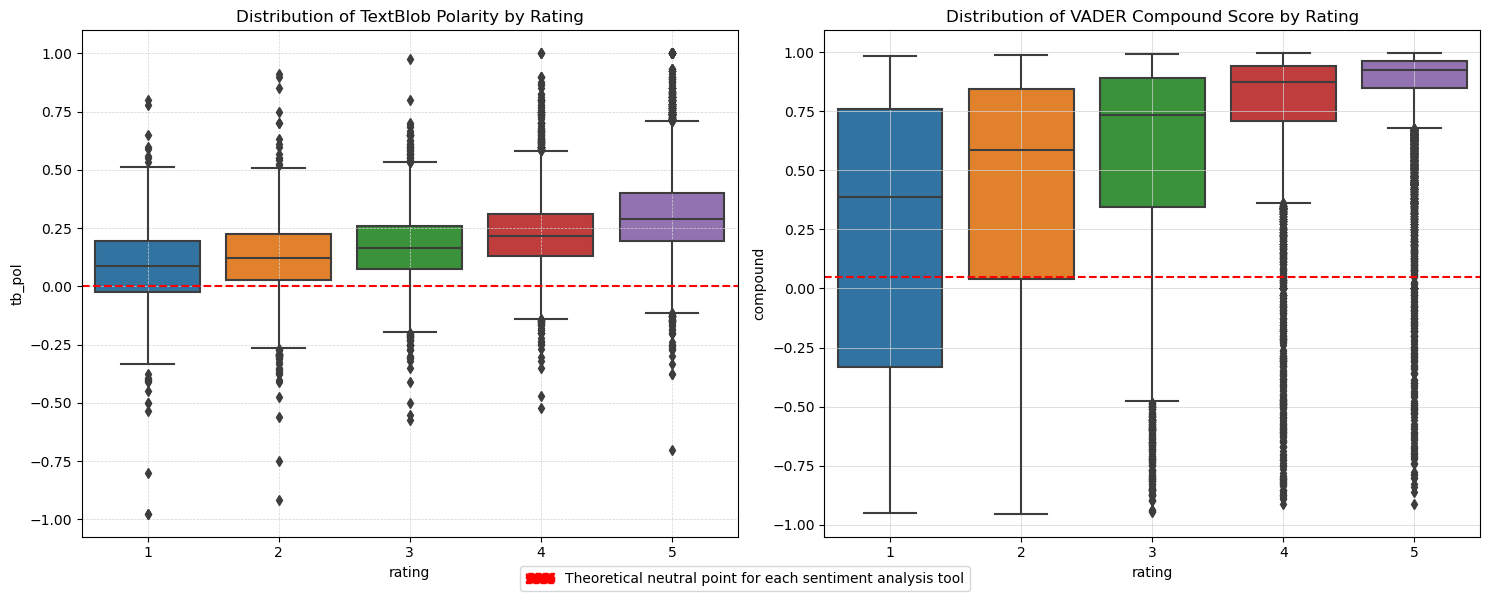

In [45]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['rating'], y=df['tb_pol'])
plt.axhline(0.00, color='red', linestyle='--')  # adds horizontal line at y=0.05 for neutral point

plt.title('Distribution of TextBlob Polarity by Rating')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, zorder=0) 

plt.subplot(1, 2, 2)
sns.boxplot(x=df['rating'], y=df['compound'])

plt.axhline(0.05, color='red', linestyle='--')  #adds horizontal line at y=0.05 for neutral point
plt.title('Distribution of VADER Compound Score by Rating')
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5, which='both', zorder=0) 

plt.subplots_adjust(bottom=0.2) #subplot layout adjusted to make space for the legend below

red_line = mpatches.Patch(color='red', linestyle='--', label='Theoretical neutral point for each sentiment analysis tool')

plt.figlegend(handles=[red_line], loc='lower center', ncol=1)

plt.tight_layout()
plt.show()

In [46]:
tb_medians = df.groupby(['rating'])['tb_pol'].median() 
vader_medians = df.groupby(['rating'])['compound'].median()

print("TextBlob Median Sentiment Scores by Rating:")
for rating, median in tb_medians.items():
    print(f"Rating {rating}: {median:.2f}")

print("\nVADER Median Sentiment Scores by Rating:")
for rating, median in vader_medians.items():
    print(f"Rating {rating}: {median:.2f}")

TextBlob Median Sentiment Scores by Rating:
Rating 1: 0.09
Rating 2: 0.12
Rating 3: 0.16
Rating 4: 0.21
Rating 5: 0.29

VADER Median Sentiment Scores by Rating:
Rating 1: 0.39
Rating 2: 0.59
Rating 3: 0.73
Rating 4: 0.88
Rating 5: 0.93


## 6.3 Determining Sentiment Thresholds

### In theory, VADER proposes that scores above 0.05 are considered positive, below 0.05 negative, and exactly 0.05 neutral. TextBlob, on the other hand, considers scores above 0 as positive, below 0 as negative, and 0 as neutral. This discrepancy implies that there is a varying spectrum of sentiment classification between the two tools, which warrants recalibration of the thresholds to align with empirical user rating data.
### For a better interpretation of the sentiment of a text from the analysis, new thresholds will be defined to better fit this dataset. With the baseline assumption that user ratings 3 as neutral and the median of calculated would be placed as NEUTRAL would be Texblob 0.16 and VADER 0.73.

## 6.4 Sentiment Classification

explain what are you going to do

In [47]:
#VADER INTO SENTIMENT
def find_sentiment_vader(compound_score):
    if compound_score > 0.73:
        return "POSITIVE"
    elif compound_score < 0.73:
        return "NEGATIVE"
    else:
        return "NEUTRAL"   
    
df['vader_sentiment'] = df['compound'].apply(find_sentiment_vader)

In [48]:
#TEXTBLOB INTO SENTIMENT
def find_sentiment_textblob(tb_pol):
    if tb_pol > 0.16:
        return "POSITIVE"
    elif tb_pol < 0.16:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df['tb_sentiment'] = df['tb_pol'].apply(find_sentiment_textblob)

In [49]:
#RATINGS INTO SENTIMENT
def find_sentiment_rating(rate):
    if rate > 3:
        return "POSITIVE"
    elif rate < 3:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df['rating_sentiment'] = df['rating'].apply(find_sentiment_rating)

## 6.5 Classification Stats

In [50]:
def compare_sentiments(row):
    return {
        'tb_match': row['tb_sentiment'] == row['rating_sentiment'],
        'vader_match': row['vader_sentiment'] == row['rating_sentiment']
    }

comparison_df = pd.DataFrame([compare_sentiments(row) for _, row in df.iterrows()])

results = {
    'TextBlob': {
        'matches': comparison_df['tb_match'].sum(),
        'not_matches': (~comparison_df['tb_match']).sum(),
        'accuracy': comparison_df['tb_match'].mean() * 100
    },
    'Vader': {
        'matches': comparison_df['vader_match'].sum(),
        'not_matches': (~comparison_df['vader_match']).sum(),
        'accuracy': comparison_df['vader_match'].mean() * 100
    }
}

for analyzer, stats in results.items():
    print(f"{analyzer} Accuracy: {stats['accuracy']:.2f}%")
    print(f"{analyzer} Total matches: {stats['matches']}")
    print(f"{analyzer} Total not matches: {stats['not_matches']}")
    
#Note to self: This results dictionary divided in 2 parts: the tool, inside each tool there is these 3 elements. 
#analyzer&stats asigned to be able to call the elements

TextBlob Accuracy: 66.57%
TextBlob Total matches: 15071
TextBlob Total not matches: 7570
Vader Accuracy: 71.04%
Vader Total matches: 16084
Vader Total not matches: 6557


In [51]:
#test_comparison_df = df.apply(compare_sentiments, axis=1)
#print(test_comparison_df)

#Note to self: double checking how the code works, df.iterrows() for each line selects pairs of (index, row data). 
#Example:
#0        {'tb_match': True, 'vader_match': True}  
#Then it ignores the index '0' because of this: for _, row in 
#And transforms the list of mdictionaries into a DataFrame

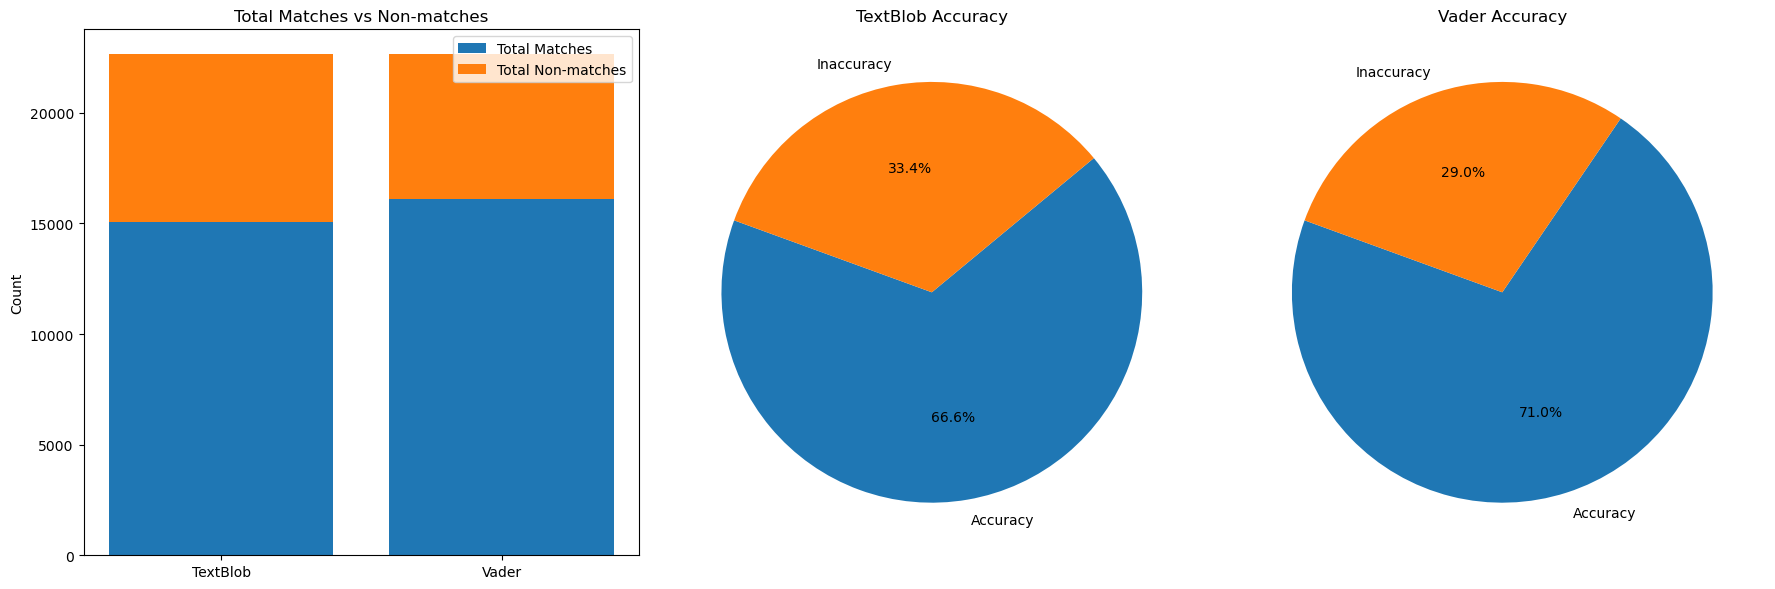

In [52]:
analyzers = list(results.keys())
accuracies = [results[analyzer]['accuracy'] for analyzer in analyzers]
matches = [results[analyzer]['matches'] for analyzer in analyzers]
not_matches = [results[analyzer]['not_matches'] for analyzer in analyzers]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#BAR PLOTS
axes[0].bar(analyzers, matches, label='Total Matches')
axes[0].bar(analyzers, not_matches, bottom=matches, label='Total Non-matches')
axes[0].set_title('Total Matches vs Non-matches')
axes[0].set_ylabel('Count')
axes[0].legend()

#PIE CHARTS
axes[1].pie([accuracies[0], 100-accuracies[0]], labels=['Accuracy', 'Inaccuracy'], autopct='%1.1f%%', startangle=160)
axes[1].set_title('TextBlob Accuracy')

axes[2].pie([accuracies[1], 100-accuracies[1]], labels=['Accuracy', 'Inaccuracy'], autopct='%1.1f%%', startangle=160)
axes[2].set_title('Vader Accuracy')

plt.tight_layout()
plt.show()

### Apparently Vader has a higher Accuracy level (71%) than TextBlob (66%), which in numbers is a difference of 1000 cases. The 2 tools probably has a similar way to analyze it, do they coincide in the cases? what are these cases were it is not accurate?

### Validation test

In [53]:
if (results['TextBlob']['matches'] + results['TextBlob']['not_matches'] == len(df) & results['Vader']['matches'] + results['Vader']['not_matches'] == len(df)): # and (vader_matches + vader_not_matches == len(df)):
   print("Test passed: All reviews have been accounted for.")
else:
   print("Test not passed: The counts do not match the number of reviews.")

Test passed: All reviews have been accounted for.


## 6.5 Correlation with Ratings

In [54]:
print("Correlation between rating and TextBlob polarity:", df['rating'].corr(df['tb_pol']))
print("Correlation between rating and VADER compound:", df['rating'].corr(df['compound']))

Correlation between rating and TextBlob polarity: 0.3863030372204921
Correlation between rating and VADER compound: 0.47345884392621806


### Since both metrics have a positive correlation, it means that as user ratings increase, both sentiment metrics tend to increase. Vader has a higher correlation with ratings but it is still a low one on 0.47, against 0.38 of Textblob. 

### This results is aligned with the sentiment classification

# 7. Business Insights
## Do TextBlob and VADER agree on the sentiment of reviews, or are there discrepancies? If so, in what scenarios?

## 7.1 Quantitative Analysis

### To get a deeper focus on what cases both tools coincide, and which are the cases were none of the tools could get an accurate result. For this a new function that changes the classification of accuracy either TextBlob or Vader got it right. 

In [55]:
def classify_accurate(row):
    if row['rating_sentiment'] == 'POSITIVE' and (row['tb_sentiment'] == 'POSITIVE' or row['vader_sentiment'] == 'POSITIVE'):
        return 'accurate'
    elif row['rating_sentiment'] == 'NEGATIVE' and (row['tb_sentiment'] == 'NEGATIVE' or row['vader_sentiment'] == 'NEGATIVE'):
        return 'accurate'
    else:
        return 'no_accurate'

df['accurate_type'] = df.apply(classify_accurate, axis=1)

accurate_count = df['accurate_type'].value_counts().get('accurate', 0)
no_accurate_count = df['accurate_type'].value_counts().get('no_accurate', 0)

total_reviews = len(df)

print(f"Accuracy by at least one tool: {accurate_count / total_reviews * 100:.2f}%")
print(f"Non accuracy by any of the tools: {no_accurate_count / total_reviews * 100:.2f}%")

Accuracy by at least one tool: 79.01%
Non accuracy by any of the tools: 20.99%


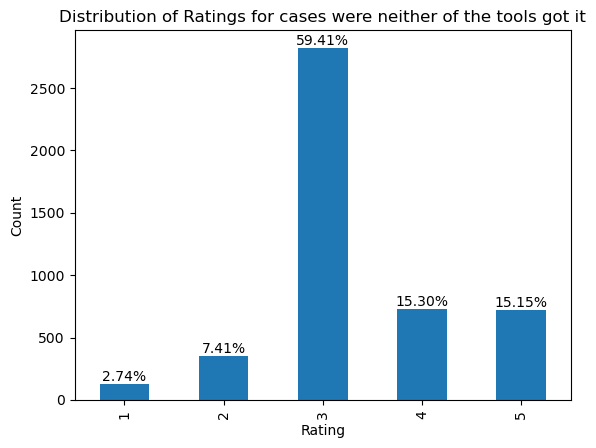

In [56]:
accurate = df[df['accurate_type'] == 'accurate']
no_accurate = df[df['accurate_type'] == 'no_accurate']

rating_counts = no_accurate['rating'].value_counts().sort_index()
total = rating_counts.sum()

rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings for cases were neither of the tools got it')
plt.xlabel('Rating')
plt.ylabel('Count')

for index, value in enumerate(rating_counts): #percentage per bar
    percentage = f'{(value / total) * 100:.2f}%'
    plt.text(index, value, percentage, ha='center', va='bottom')

plt.show()

### Mostly cases were none of the tools classified it accurately were rated by the Customer with 3. Considering it Neutral ones. 

In [57]:
no_accurate_neutral = df[(df['accurate_type'] == 'no_accurate') & (df['rating'] == 3)]

## 7.2 Qualitative Analysis

### Cases were none of the tools got it accurate and are neutral ones

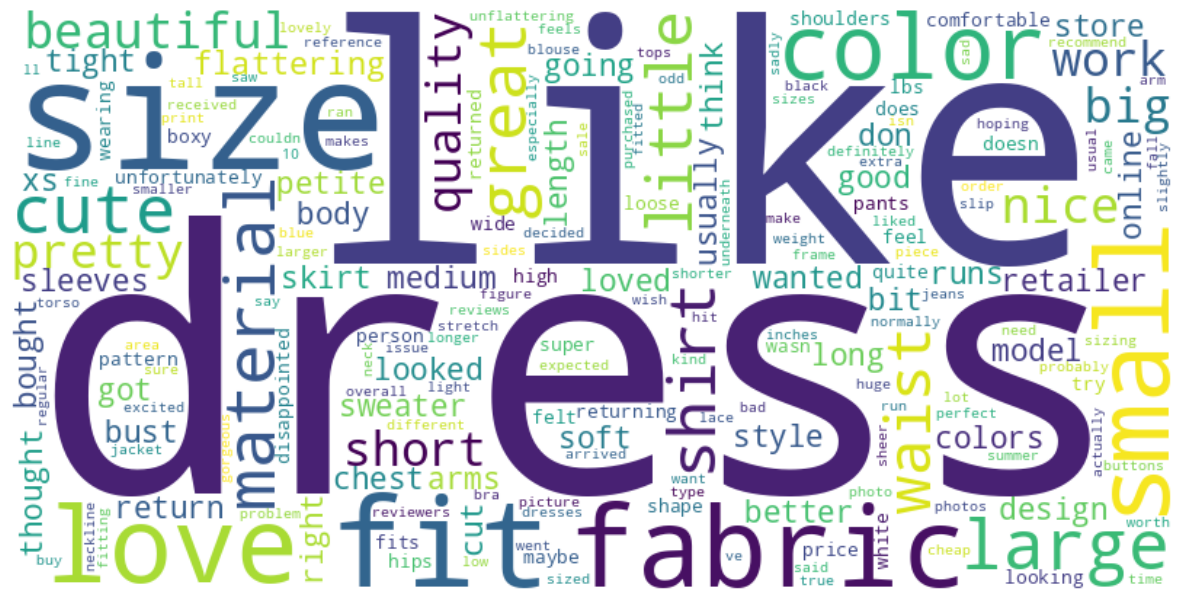

In [58]:
custom_stop_words = ['just', 'really', 'look', 'didn', 'did', 'wear', 'tried', 'looks', 'way', 'ordered'] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Added some extra words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

no_accu_matrix = vectorizer.fit_transform(no_accurate_neutral['review_text'])
frequent_words = vectorizer.get_feature_names_out()
word_counts = no_accu_matrix.sum(axis=0)
word_freq = dict(zip(frequent_words, word_counts.tolist()[0]))
#sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20] # Top 20 words
#sorted_word_freq

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Note to self: off the axis
plt.show()

# lowest avg ratings

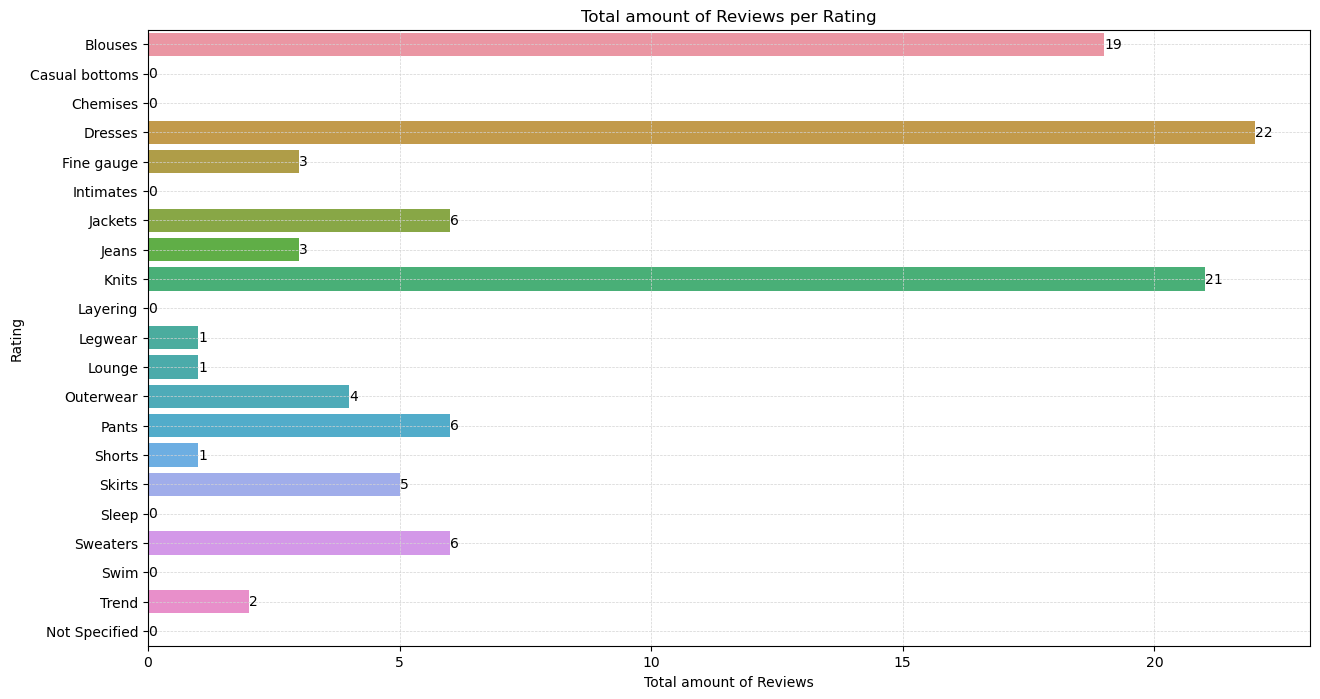

In [59]:
plt.figure(figsize=(15, 8))

rating_counts = lowest_avg_ratings['class_name'].value_counts().sort_index()  # reviews' count per rating

# Create a horizontal bar chart
sns.barplot(x=rating_counts.values, y=rating_counts.index)  # Note the swapped x and y

# Annotating each bar with its total count
for i, count in enumerate(rating_counts.values):
    plt.text(count, i, str(count), va='center')  # Adjust text position for horizontal bar

plt.ylabel('Rating')
plt.xlabel('Total amount of Reviews')
plt.title('Total amount of Reviews per Rating')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)

plt.show()

In [60]:
dresses = lowest_avg_ratings[lowest_avg_ratings['class_name']=='Dresses']

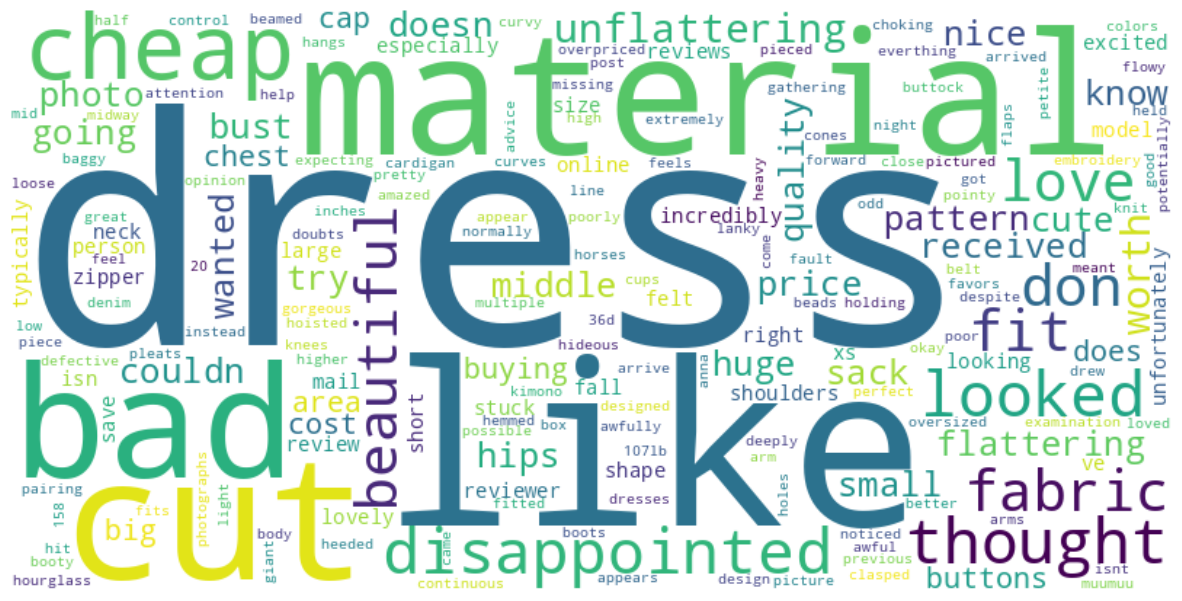

In [61]:
custom_stop_words = ['just', 'really', 'look', 'didn', 'did', 'wear', 'tried', 'looks', 'way', 'ordered'] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Added some extra words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

no_accu_matrix = vectorizer.fit_transform(dresses['review_text'])
frequent_words = vectorizer.get_feature_names_out()
word_counts = no_accu_matrix.sum(axis=0)
word_freq = dict(zip(frequent_words, word_counts.tolist()[0]))
#sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20] # Top 20 words
#sorted_word_freq

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Note to self: off the axis
plt.show()

# Top dissagreements
the presence of sarcasm, mixed emotions, or certain colloquial phrases might cause one method to interpret the sentiment differently than the other.

To determine the proportion of disagreements that are false positives or false negatives, you need a "ground truth" to compare against. This ground truth could be the user ratings themselves if you assume that a certain range of ratings (e.g., 4-5) definitely indicates a positive sentiment, a range indicates a negative sentiment (e.g., 1-2), and the middle range (e.g., 3) indicates a neutral sentiment.

Here is a step-by-step approach:

* Define Ground Truth Based on Ratings: Categorize the user ratings into positive, negative, and neutral.
* Categorize the Disagreements: Within the disagreements, categorize each instance as a false positive or false negative based on how the sentiment analysis result compares to the ground truth.
* Calculate Proportions: Calculate the proportion of false positives and false negatives.Keep in mind that this approach assumes that user ratings are an accurate reflection of sentiment, which might not always be the case. Ratings can be influenced by factors other than sentiment, such as product quality, expectations, or individual rating habits.

In [62]:
df['sentiment_difference'] = abs(df['tb_pol'] - df['compound'])
disagreements = df.sort_values(by='sentiment_difference', ascending=False)

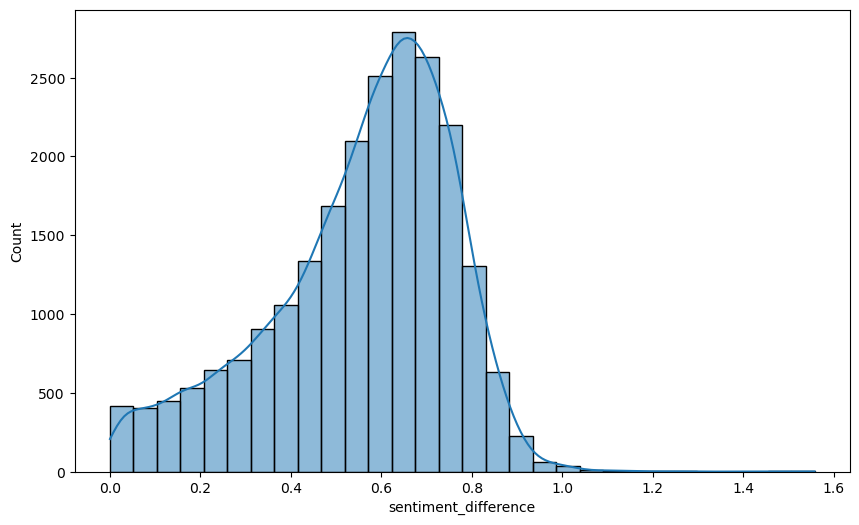

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_difference'], kde=True, bins=30) 

plt.show()

In [64]:
disagreements = df[df['sentiment_difference'] > 0.9]

sorted_high_disagreements = disagreements.sort_values(by='sentiment_difference', ascending=False)

display(sorted_high_disagreements.head(10)[['review_text', 'rating', 'tb_pol', 'compound', 'sentiment_difference']])

,review_text,rating,tb_pol,compound,sentiment_difference
18291,The details and colors are exquisite. stop hesitating and get this dress,5,1.000000,-0.5574,1.557400
16830,"This shirt is cute, nice cut, but i don't love it. best as a sleeping tank.",3,0.650000,-0.8296,1.479600
22301,"Gorgeous dress, but so low in front and in back...i couldn't figure out how to pull it off without a cardigan/sweater. beautiful fabric and color.",3,0.516667,-0.7454,1.262067
20861,"I wasn't sure about this dress, and decided to give it a shot based on reviews, could not be happier. before trying it on i was worried about the length, and always worry about dreaded button gap at the chest, but none of that is an issue.",5,0.500000,-0.7406,1.240600
15137,This dress is effortlessly chic. i wore it with black tights and booties and it was perfection. will definitely be a casual staple year around.,5,-0.333333,0.8519,1.185233
4137,"Casual comfort with style! fabric is a dream to wear and it flows nicely. not exactly form-fitting, but still flattering. i'm 5'9, 140, and wore the medium.",5,-0.375000,0.7809,1.155900
20082,"This was a nice dress, but it wasn't quite was i was looking for. the cut made me look too ""hippy"". maybe for someone that has no hips at all?",4,0.600000,-0.5499,1.149900
14264,It's way more distressed than it looks in the picture and that was a no for me.,2,0.500000,-0.6478,1.147800
17915,This is one of my favorite pair of pants. they don't stretch out while wearing and wash well. no pilling or shrinking. they can either be worn like leggings or pants. i wear a size 2 pants but got these in a 27 because i don't like them super fitted.,5,0.416667,-0.6988,1.115467
272,"I want to live in this sweatshirt. it's so comfy, but also well-cut and lays nicely, not boxy at all. i'm typically a 10-12 or l in tops and the 3 is roomy without looking sloppy.",5,-0.186742,0.9253,1.112042


## 1. Quantitative Analysis
## A. Distribution of Ratings:
Check the distribution of user ratings for these disagreements. Are disagreements more common at certain rating levels?

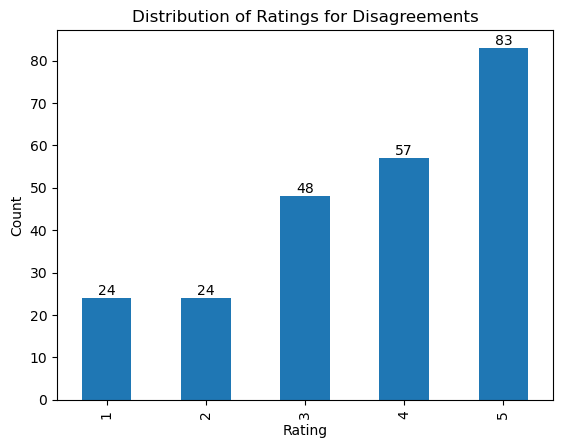

In [65]:
rating_counts = disagreements['rating'].value_counts().sort_index()

rating_counts.plot(kind='bar')

plt.title('Distribution of Ratings for Disagreements')
plt.xlabel('Rating')
plt.ylabel('Count')

for index, value in enumerate(rating_counts): 
    plt.text(index, value, str(value), ha='center', va='bottom') #sum per bar

plt.show()

### 5. Actionable Insights
#### A. Improvement Opportunities:
Identify patterns in disagreements that could be used to **improve the sentiment analysis models**, like training on domain-specific data.

#### B. Business Insights:
Understand if the disagreements point to any specific product issues or customer service aspects that could be addressed.

#### C. Reporting:
Prepare a report with** examples to illustrate the types of disagreements **and potential **reasons behind them**.

### 6. Visualization
#### A. Heatmaps:
Create heatmaps to visualize the concentration of sentiment scores against ratings.

#### B. Word Clouds:
Generate word clouds from the **text of the disagreed reviews** to visualize **frequently occurring terms**.

### 7. Expert Review
Finally, for a subset of disagreements, especially those with 
# **high user ratings** but **negative sentiment scores** (or vice versa), 
consider having them reviewed by a human expert. This can help identify nuances that the sentiment analysis model is missing.

## Does a higher rating correlate with a more positive sentiment score? Are there any anomalies, such as high ratings with negative sentiment scores or vice-versa? Which sentiment analysis tool (TextBlob or VADER) correlates more strongly with explicit ratings?

## More questions: running corr on the different group that they weere detected during the walkthrough of the dataframe. Maybe it works better on the ones that have more reviews, or on the ones with the lowest scores, or highest. 

## Also, a WordCloud looking up for certain words would be interesting

In [66]:
# ser = next(iter(df.groupby("outlet", sort=False)["title"]))
#ser.str.contains("Fed")

#for future analysis, looking up dor strings, ex. positive reeviews have mostly this string, neg has thiss one.

#### understanding relationship between the calculated fields
correlación entre rating y pos no es tanta como me imaginaba, 

if the distribution concetrates most of the reviews in 5 stars / pos

## Can we identify common themes in negative reviews that point to specific areas where the product or service can be improved?

# 8. Conclusion <a class="anchor"  id="section6"></a>

Posibles aplicacionees: comparación entre liberarias y ver cuál es más acertada https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

# 9. References

Sources: 
https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d

https://medium.com/mlearning-ai/nlp-day-5-feelings-are-important-a-basic-sentiment-analysis-c09cb01a6bf8

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

https://medium.com/analytics-vidhya/sentiment-analysis-using-textblob-ecaaf0373dff


https://analyticsindiamag.com/how-to-obtain-a-sentiment-score-for-a-sentence-using-textblob/


Thanks. Any suggestions are welcomed :)